# The purpose of this code is review parameters in SVM algorithms.

In [1]:
import os
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import decimal


In [2]:
df = pd.read_csv("human-activity-recognition-with-smartphones.csv")

In [3]:
print(f"Dataframe shape : {df.shape}")

Dataframe shape : (7352, 563)


In [4]:
df.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [5]:
list_of_activity = df["Activity"].unique().tolist() 
print(list_of_activity)

['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [6]:
X = df.drop(columns = "Activity")
print(X.shape)

(7352, 562)


In [7]:
y = df["Activity"]
print(y.shape)

(7352,)


In [8]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [9]:
SVM_classifer = svm.SVC()

In [10]:
fitted_SVM = SVM_classifer.fit(X_train, y_train)

In [11]:
y_predicted = fitted_SVM.predict(X_test)

In [12]:
first_prediction = accuracy_score(y_test, y_predicted)
print(first_prediction)

0.9435757987763427


**class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)**


In [13]:
Kernels = ['linear', 'poly', 'rbf', 'sigmoid']


In [14]:
prediction_results_kernel = []

In [24]:
prediction_results_kernel.clear()
for i in range(4):
    
    SVM_classifer_kernel = svm.SVC(kernel = Kernels[i])
    fitted_SVM_kernel = SVM_classifer_kernel.fit(X_train, y_train)
    y_predicted_kernel = fitted_SVM_kernel.predict(X_test)
    prediction = accuracy_score(y_test, y_predicted_kernel)
    prediction_results_kernel.append(prediction)
    print(f"{Kernels[i]} done.")

linear done.
poly done.
rbf done.
sigmoid done.


In [25]:
prediction_results_kernel

[0.9870836165873556,
 0.946974847042828,
 0.9435757987763427,
 0.34398368456832085]

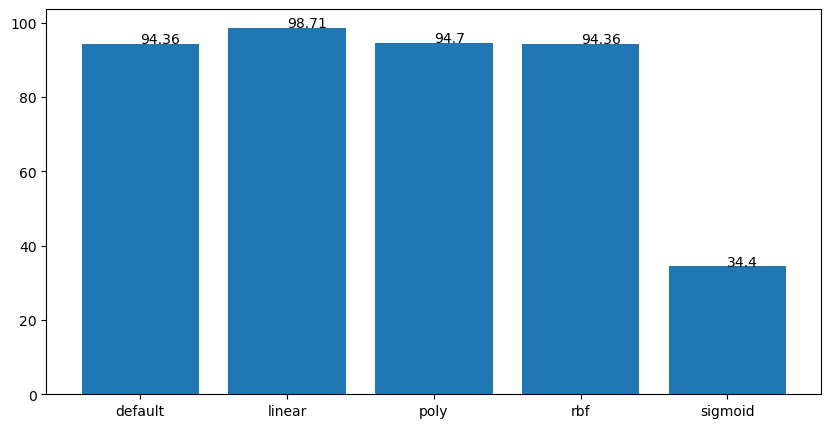

In [26]:
import matplotlib.pyplot as plt

execution = ["default",Kernels[0],
Kernels[1],
Kernels[2],
Kernels[3]]

accuracy = [float(round(first_prediction*100,2)), float(round(prediction_results_kernel[0]*100,2)),
float(round(prediction_results_kernel[1]*100,2)),
float(round(prediction_results_kernel[2]*100,2)),
float(round(prediction_results_kernel[3]*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

In [ ]:
for i in range(4):
    f = f'float(round(prediction_results_kernel[{i}]*100,2))'
    print(f'{f},')

float(round(prediction_results_kernel[0]*100,2)),
float(round(prediction_results_kernel[1]*100,2)),
float(round(prediction_results_kernel[2]*100,2)),
float(round(prediction_results_kernel[3]*100,2)),


In [ ]:
for i in range(4):
    f = f"Kernels[{i}],"
    print(f)

Kernels[0],
Kernels[1],
Kernels[2],
Kernels[3],


**degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.**

In [32]:
prediction_results_degree = []

In [40]:
prediction_results_degree.clear()

for i in range(2,6):
    
    SVM_classifer_degree = svm.SVC(kernel = 'poly', degree = i)
    fitted_SVM_degree = SVM_classifer_degree.fit(X_train, y_train)
    y_predicted_degree = fitted_SVM_degree.predict(X_test)
    prediction = accuracy_score(y_test, y_predicted_degree)
    print(prediction)
    prediction_results_degree.append(prediction)
    print(f" degree = {i} done.")

0.9456152277362339
 degree = 2 done.
0.946974847042828
 degree = 3 done.
0.920462270564242
 degree = 4 done.
0.8898708361658736
 degree = 5 done.


In [39]:
prediction_results_degree 

[0.9456152277362339, 0.946974847042828, 0.920462270564242, 0.8898708361658736]

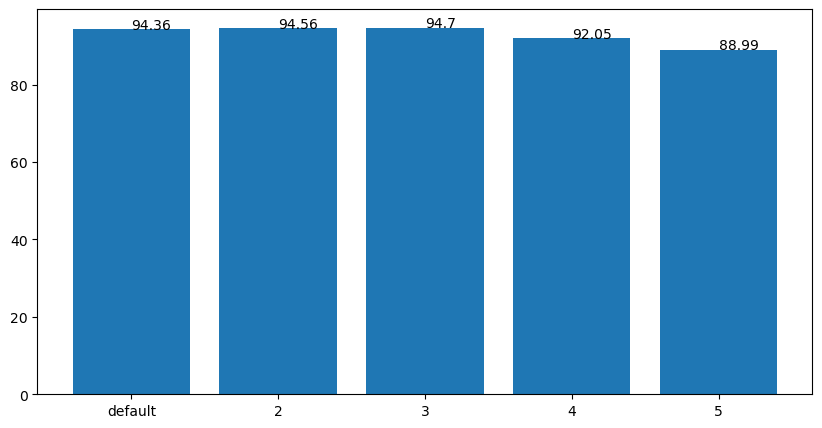

In [41]:
import matplotlib.pyplot as plt

execution = ["default",'2','3','4','5']

accuracy = [float(round(first_prediction*100,2)), float(round(prediction_results_degree[0]*100,2)),
float(round(prediction_results_degree[1]*100,2)),
float(round(prediction_results_degree[2]*100,2)),
float(round(prediction_results_degree[3]*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()